In [1]:
import sys
from dl_portfolio.utils import load_result
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.preprocessing import StandardScaler
import numpy as np

from dl_portfolio.data import load_data
from dl_portfolio.pathconfig import DATA_DIR, WORKING_DIR

SAVE = False
SAVE_DIR = "paper_result_update/ae"
dataset="dataset1"
ae_run_path = f"{WORKING_DIR}/final_models/ae/dataset1/m_0_seed_6_1682872204041201"

sys.path.append(ae_run_path)

import ae_config as config

cvs = list(config.data_specs.keys())
data, assets = load_data(dataset=config.dataset)
returns = data.pct_change(1).dropna()

input_dim = len(assets)
n_features = None

In [2]:
all_relu_activation = pd.DataFrame()
relu_act_threshold = pd.DataFrame()
scaler = StandardScaler()

for cv in config.data_specs:
    data_spec = config.data_specs[cv]
    (
        model,
        _,
        dates,
        test_data,
        test_features,
        pred,
        embedding,
        decoding,
        relu_act,
        decoder_bias,
        u_relu,
        u_batchnorm,
        new_order,
    ) = load_result(config,
                    "train",
                    data,
                    assets,
                    ae_run_path,
                    cv,
                    reorder_features=True)
    
    
    train_lin_act = pd.read_csv(
        f"{WORKING_DIR}/activationProba/data/{dataset}/{cv}/train_linear_activation.csv",
        index_col=0,
        parse_dates=True)
    train_lin_act = train_lin_act.iloc[:, new_order]
    train_lin_act.columns = test_features.columns

    test_lin_act = pd.read_csv(
        f"{WORKING_DIR}/activationProba/data/{dataset}/{cv}/test_linear_activation.csv",
        index_col=0,
        parse_dates=True)
    test_lin_act = test_lin_act.iloc[:, new_order]
    test_lin_act.columns = test_features.columns
    
    inter = pd.read_json(f"{WORKING_DIR}/activationProba/data/{dataset}/{cv}/intercept.json")
    inter = inter.T
    inter = pd.DataFrame(
        np.repeat(inter.values, len(test_lin_act), axis=0),
        columns=assets,
        index=test_lin_act.index,
    )
    
    exceed = ((train_lin_act <= 0).sum())/len(train_lin_act)
    exceed = pd.DataFrame(np.repeat(exceed.values.reshape(1, -1), len(train_lin_act), axis=0),
                     index=train_lin_act.index, 
                     columns=exceed.index)

    if cv == 0:
        train_lin_activation = train_lin_act
        test_lin_activation = test_lin_act
        exceedance = exceed.copy()
        intercept = inter.copy()
    else:
        exceed = exceed.loc[exceedance.index[-1]:].iloc[1:]
        exceedance = pd.concat([exceedance, exceed])
        
        train_lin_act = train_lin_act.loc[
                        train_lin_activation.index[-1]:].iloc[1:]
        train_lin_activation = pd.concat([train_lin_activation, train_lin_act])
        
        test_lin_activation = pd.concat([test_lin_activation, test_lin_act])
        intercept = pd.concat([intercept, inter])
        assert not test_lin_activation.index.duplicated().any()

    relu_act_threshold = pd.concat([relu_act_threshold, u_relu])
    all_relu_activation = pd.concat([all_relu_activation, relu_act])

all_dates = train_lin_activation.index.union(test_lin_activation.index)
all_dates = all_dates[~all_dates.duplicated()]
relu_act_threshold = relu_act_threshold.reindex(all_dates).fillna(method="ffill")
exceedance = exceedance.reindex(all_dates).fillna(method="ffill")

2023-06-14 14:16:56.114313: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2023-06-14 14:16:56.116889: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
[DL-Portfolio-Logger:data.py:182] - [3348] - 2023-06-14 14:16:56,454 - DEBUG - Train from 2015-09-01 00:00:00 to 2017-04-28 00:00:00
[DL-Portfolio-Logger:data.py:184] - [3348] - 2023-06-14 14:16:56,456 - DEBUG - Validation from 2017-05-01 00:00:00 to 2017-05-31 00:00:00
[DL-Portfolio-Logger:data.py:188] - [3348] - 2023-06-14 14:16:56,456 - DEBUG - Test from 2017-06-01 00:00:00 to 2017-06-30 00:00:00
2023-06-14 14:16:56.521152: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimizati

[DL-Portfolio-Logger:data.py:182] - [3348] - 2023-06-14 14:16:57,807 - DEBUG - Train from 2015-09-01 00:00:00 to 2017-06-29 00:00:00
[DL-Portfolio-Logger:data.py:184] - [3348] - 2023-06-14 14:16:57,808 - DEBUG - Validation from 2017-07-03 00:00:00 to 2017-07-31 00:00:00
[DL-Portfolio-Logger:data.py:188] - [3348] - 2023-06-14 14:16:57,808 - DEBUG - Test from 2017-08-01 00:00:00 to 2017-08-31 00:00:00


[DL-Portfolio-Logger:data.py:182] - [3348] - 2023-06-14 14:16:58,183 - DEBUG - Train from 2015-09-01 00:00:00 to 2017-07-31 00:00:00
[DL-Portfolio-Logger:data.py:184] - [3348] - 2023-06-14 14:16:58,184 - DEBUG - Validation from 2017-08-01 00:00:00 to 2017-08-31 00:00:00
[DL-Portfolio-Logger:data.py:188] - [3348] - 2023-06-14 14:16:58,185 - DEBUG - Test from 2017-09-01 00:00:00 to 2017-09-29 00:00:00


[DL-Portfolio-Logger:data.py:182] - [3348] - 2023-06-14 14:16:58,550 - DEBUG - Train from 2015-09-01 00:00:00 to 2017-08-31 00:00:00
[DL-Portfolio-Logger:data.py:184] - [3348] - 2023-06-14 14:16:58,551 - DEBUG - Validation from 2017-09-01 00:00:00 to 2017-09-28 00:00:00
[DL-Portfolio-Logger:data.py:188] - [3348] - 2023-06-14 14:16:58,552 - DEBUG - Test from 2017-10-02 00:00:00 to 2017-10-31 00:00:00


[DL-Portfolio-Logger:data.py:182] - [3348] - 2023-06-14 14:16:58,905 - DEBUG - Train from 2015-09-01 00:00:00 to 2017-09-28 00:00:00
[DL-Portfolio-Logger:data.py:184] - [3348] - 2023-06-14 14:16:58,906 - DEBUG - Validation from 2017-10-02 00:00:00 to 2017-10-31 00:00:00
[DL-Portfolio-Logger:data.py:188] - [3348] - 2023-06-14 14:16:58,906 - DEBUG - Test from 2017-11-01 00:00:00 to 2017-11-30 00:00:00


[DL-Portfolio-Logger:data.py:182] - [3348] - 2023-06-14 14:16:59,305 - DEBUG - Train from 2015-09-01 00:00:00 to 2017-10-31 00:00:00
[DL-Portfolio-Logger:data.py:184] - [3348] - 2023-06-14 14:16:59,306 - DEBUG - Validation from 2017-11-01 00:00:00 to 2017-11-30 00:00:00
[DL-Portfolio-Logger:data.py:188] - [3348] - 2023-06-14 14:16:59,307 - DEBUG - Test from 2017-12-01 00:00:00 to 2017-12-29 00:00:00


[DL-Portfolio-Logger:data.py:182] - [3348] - 2023-06-14 14:16:59,698 - DEBUG - Train from 2015-09-01 00:00:00 to 2017-11-30 00:00:00
[DL-Portfolio-Logger:data.py:184] - [3348] - 2023-06-14 14:16:59,699 - DEBUG - Validation from 2017-12-01 00:00:00 to 2017-12-29 00:00:00
[DL-Portfolio-Logger:data.py:188] - [3348] - 2023-06-14 14:16:59,699 - DEBUG - Test from 2018-01-01 00:00:00 to 2018-01-31 00:00:00


[DL-Portfolio-Logger:data.py:182] - [3348] - 2023-06-14 14:17:00,139 - DEBUG - Train from 2015-09-01 00:00:00 to 2017-12-29 00:00:00
[DL-Portfolio-Logger:data.py:184] - [3348] - 2023-06-14 14:17:00,140 - DEBUG - Validation from 2018-01-01 00:00:00 to 2018-01-31 00:00:00
[DL-Portfolio-Logger:data.py:188] - [3348] - 2023-06-14 14:17:00,140 - DEBUG - Test from 2018-02-01 00:00:00 to 2018-02-28 00:00:00


[DL-Portfolio-Logger:data.py:182] - [3348] - 2023-06-14 14:17:00,526 - DEBUG - Train from 2015-09-01 00:00:00 to 2018-01-31 00:00:00
[DL-Portfolio-Logger:data.py:184] - [3348] - 2023-06-14 14:17:00,527 - DEBUG - Validation from 2018-02-01 00:00:00 to 2018-02-28 00:00:00
[DL-Portfolio-Logger:data.py:188] - [3348] - 2023-06-14 14:17:00,528 - DEBUG - Test from 2018-03-01 00:00:00 to 2018-03-30 00:00:00


[DL-Portfolio-Logger:data.py:182] - [3348] - 2023-06-14 14:17:00,913 - DEBUG - Train from 2015-09-01 00:00:00 to 2018-02-28 00:00:00
[DL-Portfolio-Logger:data.py:184] - [3348] - 2023-06-14 14:17:00,914 - DEBUG - Validation from 2018-03-01 00:00:00 to 2018-03-29 00:00:00
[DL-Portfolio-Logger:data.py:188] - [3348] - 2023-06-14 14:17:00,915 - DEBUG - Test from 2018-04-02 00:00:00 to 2018-04-30 00:00:00


[DL-Portfolio-Logger:data.py:182] - [3348] - 2023-06-14 14:17:01,320 - DEBUG - Train from 2015-09-01 00:00:00 to 2018-03-29 00:00:00
[DL-Portfolio-Logger:data.py:184] - [3348] - 2023-06-14 14:17:01,321 - DEBUG - Validation from 2018-04-02 00:00:00 to 2018-04-30 00:00:00
[DL-Portfolio-Logger:data.py:188] - [3348] - 2023-06-14 14:17:01,322 - DEBUG - Test from 2018-05-01 00:00:00 to 2018-05-31 00:00:00


[DL-Portfolio-Logger:data.py:182] - [3348] - 2023-06-14 14:17:01,860 - DEBUG - Train from 2015-09-01 00:00:00 to 2018-04-30 00:00:00
[DL-Portfolio-Logger:data.py:184] - [3348] - 2023-06-14 14:17:01,861 - DEBUG - Validation from 2018-05-01 00:00:00 to 2018-05-31 00:00:00
[DL-Portfolio-Logger:data.py:188] - [3348] - 2023-06-14 14:17:01,862 - DEBUG - Test from 2018-06-01 00:00:00 to 2018-06-29 00:00:00


[DL-Portfolio-Logger:data.py:182] - [3348] - 2023-06-14 14:17:02,242 - DEBUG - Train from 2015-09-01 00:00:00 to 2018-05-31 00:00:00
[DL-Portfolio-Logger:data.py:184] - [3348] - 2023-06-14 14:17:02,243 - DEBUG - Validation from 2018-06-01 00:00:00 to 2018-06-28 00:00:00
[DL-Portfolio-Logger:data.py:188] - [3348] - 2023-06-14 14:17:02,244 - DEBUG - Test from 2018-07-02 00:00:00 to 2018-07-31 00:00:00


[DL-Portfolio-Logger:data.py:182] - [3348] - 2023-06-14 14:17:02,604 - DEBUG - Train from 2015-09-01 00:00:00 to 2018-06-28 00:00:00
[DL-Portfolio-Logger:data.py:184] - [3348] - 2023-06-14 14:17:02,605 - DEBUG - Validation from 2018-07-02 00:00:00 to 2018-07-31 00:00:00
[DL-Portfolio-Logger:data.py:188] - [3348] - 2023-06-14 14:17:02,605 - DEBUG - Test from 2018-08-01 00:00:00 to 2018-08-31 00:00:00


[DL-Portfolio-Logger:data.py:182] - [3348] - 2023-06-14 14:17:02,966 - DEBUG - Train from 2015-09-01 00:00:00 to 2018-07-31 00:00:00
[DL-Portfolio-Logger:data.py:184] - [3348] - 2023-06-14 14:17:02,967 - DEBUG - Validation from 2018-08-01 00:00:00 to 2018-08-30 00:00:00
[DL-Portfolio-Logger:data.py:188] - [3348] - 2023-06-14 14:17:02,967 - DEBUG - Test from 2018-09-03 00:00:00 to 2018-09-28 00:00:00


[DL-Portfolio-Logger:data.py:182] - [3348] - 2023-06-14 14:17:03,328 - DEBUG - Train from 2015-09-01 00:00:00 to 2018-08-30 00:00:00
[DL-Portfolio-Logger:data.py:184] - [3348] - 2023-06-14 14:17:03,329 - DEBUG - Validation from 2018-09-03 00:00:00 to 2018-09-28 00:00:00
[DL-Portfolio-Logger:data.py:188] - [3348] - 2023-06-14 14:17:03,330 - DEBUG - Test from 2018-10-01 00:00:00 to 2018-10-31 00:00:00


[DL-Portfolio-Logger:data.py:182] - [3348] - 2023-06-14 14:17:03,718 - DEBUG - Train from 2015-09-01 00:00:00 to 2018-09-28 00:00:00
[DL-Portfolio-Logger:data.py:184] - [3348] - 2023-06-14 14:17:03,719 - DEBUG - Validation from 2018-10-01 00:00:00 to 2018-10-31 00:00:00
[DL-Portfolio-Logger:data.py:188] - [3348] - 2023-06-14 14:17:03,720 - DEBUG - Test from 2018-11-01 00:00:00 to 2018-11-30 00:00:00


[DL-Portfolio-Logger:data.py:182] - [3348] - 2023-06-14 14:17:04,111 - DEBUG - Train from 2015-09-01 00:00:00 to 2018-10-31 00:00:00
[DL-Portfolio-Logger:data.py:184] - [3348] - 2023-06-14 14:17:04,112 - DEBUG - Validation from 2018-11-01 00:00:00 to 2018-11-29 00:00:00
[DL-Portfolio-Logger:data.py:188] - [3348] - 2023-06-14 14:17:04,113 - DEBUG - Test from 2018-12-03 00:00:00 to 2018-12-31 00:00:00


[DL-Portfolio-Logger:data.py:182] - [3348] - 2023-06-14 14:17:04,470 - DEBUG - Train from 2015-09-01 00:00:00 to 2018-11-29 00:00:00
[DL-Portfolio-Logger:data.py:184] - [3348] - 2023-06-14 14:17:04,471 - DEBUG - Validation from 2018-12-03 00:00:00 to 2018-12-31 00:00:00
[DL-Portfolio-Logger:data.py:188] - [3348] - 2023-06-14 14:17:04,471 - DEBUG - Test from 2019-01-01 00:00:00 to 2019-01-31 00:00:00


[DL-Portfolio-Logger:data.py:182] - [3348] - 2023-06-14 14:17:04,859 - DEBUG - Train from 2015-09-01 00:00:00 to 2018-12-31 00:00:00
[DL-Portfolio-Logger:data.py:184] - [3348] - 2023-06-14 14:17:04,860 - DEBUG - Validation from 2019-01-01 00:00:00 to 2019-01-31 00:00:00
[DL-Portfolio-Logger:data.py:188] - [3348] - 2023-06-14 14:17:04,861 - DEBUG - Test from 2019-02-01 00:00:00 to 2019-02-28 00:00:00


[DL-Portfolio-Logger:data.py:182] - [3348] - 2023-06-14 14:17:05,242 - DEBUG - Train from 2015-09-01 00:00:00 to 2019-01-31 00:00:00
[DL-Portfolio-Logger:data.py:184] - [3348] - 2023-06-14 14:17:05,244 - DEBUG - Validation from 2019-02-01 00:00:00 to 2019-02-28 00:00:00
[DL-Portfolio-Logger:data.py:188] - [3348] - 2023-06-14 14:17:05,244 - DEBUG - Test from 2019-03-01 00:00:00 to 2019-03-29 00:00:00


[DL-Portfolio-Logger:data.py:182] - [3348] - 2023-06-14 14:17:05,661 - DEBUG - Train from 2015-09-01 00:00:00 to 2019-02-28 00:00:00
[DL-Portfolio-Logger:data.py:184] - [3348] - 2023-06-14 14:17:05,662 - DEBUG - Validation from 2019-03-01 00:00:00 to 2019-03-29 00:00:00
[DL-Portfolio-Logger:data.py:188] - [3348] - 2023-06-14 14:17:05,663 - DEBUG - Test from 2019-04-01 00:00:00 to 2019-04-30 00:00:00


[DL-Portfolio-Logger:data.py:182] - [3348] - 2023-06-14 14:17:06,070 - DEBUG - Train from 2015-09-01 00:00:00 to 2019-03-29 00:00:00
[DL-Portfolio-Logger:data.py:184] - [3348] - 2023-06-14 14:17:06,071 - DEBUG - Validation from 2019-04-01 00:00:00 to 2019-04-30 00:00:00
[DL-Portfolio-Logger:data.py:188] - [3348] - 2023-06-14 14:17:06,072 - DEBUG - Test from 2019-05-01 00:00:00 to 2019-05-31 00:00:00


[DL-Portfolio-Logger:data.py:182] - [3348] - 2023-06-14 14:17:06,707 - DEBUG - Train from 2015-09-01 00:00:00 to 2019-04-30 00:00:00
[DL-Portfolio-Logger:data.py:184] - [3348] - 2023-06-14 14:17:06,708 - DEBUG - Validation from 2019-05-01 00:00:00 to 2019-05-30 00:00:00
[DL-Portfolio-Logger:data.py:188] - [3348] - 2023-06-14 14:17:06,709 - DEBUG - Test from 2019-06-03 00:00:00 to 2019-06-28 00:00:00


[DL-Portfolio-Logger:data.py:182] - [3348] - 2023-06-14 14:17:07,080 - DEBUG - Train from 2015-09-01 00:00:00 to 2019-05-30 00:00:00
[DL-Portfolio-Logger:data.py:184] - [3348] - 2023-06-14 14:17:07,081 - DEBUG - Validation from 2019-06-03 00:00:00 to 2019-06-28 00:00:00
[DL-Portfolio-Logger:data.py:188] - [3348] - 2023-06-14 14:17:07,082 - DEBUG - Test from 2019-07-01 00:00:00 to 2019-07-31 00:00:00


[DL-Portfolio-Logger:data.py:182] - [3348] - 2023-06-14 14:17:07,445 - DEBUG - Train from 2015-09-01 00:00:00 to 2019-06-28 00:00:00
[DL-Portfolio-Logger:data.py:184] - [3348] - 2023-06-14 14:17:07,446 - DEBUG - Validation from 2019-07-01 00:00:00 to 2019-07-31 00:00:00
[DL-Portfolio-Logger:data.py:188] - [3348] - 2023-06-14 14:17:07,447 - DEBUG - Test from 2019-08-01 00:00:00 to 2019-08-30 00:00:00


[DL-Portfolio-Logger:data.py:182] - [3348] - 2023-06-14 14:17:07,818 - DEBUG - Train from 2015-09-01 00:00:00 to 2019-07-31 00:00:00
[DL-Portfolio-Logger:data.py:184] - [3348] - 2023-06-14 14:17:07,819 - DEBUG - Validation from 2019-08-01 00:00:00 to 2019-08-29 00:00:00
[DL-Portfolio-Logger:data.py:188] - [3348] - 2023-06-14 14:17:07,821 - DEBUG - Test from 2019-09-02 00:00:00 to 2019-09-30 00:00:00


[DL-Portfolio-Logger:data.py:182] - [3348] - 2023-06-14 14:17:08,183 - DEBUG - Train from 2015-09-01 00:00:00 to 2019-08-29 00:00:00
[DL-Portfolio-Logger:data.py:184] - [3348] - 2023-06-14 14:17:08,184 - DEBUG - Validation from 2019-09-02 00:00:00 to 2019-09-30 00:00:00
[DL-Portfolio-Logger:data.py:188] - [3348] - 2023-06-14 14:17:08,184 - DEBUG - Test from 2019-10-01 00:00:00 to 2019-10-31 00:00:00


[DL-Portfolio-Logger:data.py:182] - [3348] - 2023-06-14 14:17:08,573 - DEBUG - Train from 2015-09-01 00:00:00 to 2019-09-30 00:00:00
[DL-Portfolio-Logger:data.py:184] - [3348] - 2023-06-14 14:17:08,574 - DEBUG - Validation from 2019-10-01 00:00:00 to 2019-10-31 00:00:00
[DL-Portfolio-Logger:data.py:188] - [3348] - 2023-06-14 14:17:08,575 - DEBUG - Test from 2019-11-01 00:00:00 to 2019-11-29 00:00:00


[DL-Portfolio-Logger:data.py:182] - [3348] - 2023-06-14 14:17:08,949 - DEBUG - Train from 2015-09-01 00:00:00 to 2019-10-31 00:00:00
[DL-Portfolio-Logger:data.py:184] - [3348] - 2023-06-14 14:17:08,950 - DEBUG - Validation from 2019-11-01 00:00:00 to 2019-11-28 00:00:00
[DL-Portfolio-Logger:data.py:188] - [3348] - 2023-06-14 14:17:08,951 - DEBUG - Test from 2019-12-02 00:00:00 to 2019-12-31 00:00:00


[DL-Portfolio-Logger:data.py:182] - [3348] - 2023-06-14 14:17:09,335 - DEBUG - Train from 2015-09-01 00:00:00 to 2019-11-28 00:00:00
[DL-Portfolio-Logger:data.py:184] - [3348] - 2023-06-14 14:17:09,336 - DEBUG - Validation from 2019-12-02 00:00:00 to 2019-12-31 00:00:00
[DL-Portfolio-Logger:data.py:188] - [3348] - 2023-06-14 14:17:09,336 - DEBUG - Test from 2020-01-01 00:00:00 to 2020-01-31 00:00:00


[DL-Portfolio-Logger:data.py:182] - [3348] - 2023-06-14 14:17:09,715 - DEBUG - Train from 2015-09-01 00:00:00 to 2019-12-31 00:00:00
[DL-Portfolio-Logger:data.py:184] - [3348] - 2023-06-14 14:17:09,716 - DEBUG - Validation from 2020-01-01 00:00:00 to 2020-01-30 00:00:00
[DL-Portfolio-Logger:data.py:188] - [3348] - 2023-06-14 14:17:09,716 - DEBUG - Test from 2020-02-03 00:00:00 to 2020-02-28 00:00:00


[DL-Portfolio-Logger:data.py:182] - [3348] - 2023-06-14 14:17:10,099 - DEBUG - Train from 2015-09-01 00:00:00 to 2020-01-30 00:00:00
[DL-Portfolio-Logger:data.py:184] - [3348] - 2023-06-14 14:17:10,100 - DEBUG - Validation from 2020-02-03 00:00:00 to 2020-02-27 00:00:00
[DL-Portfolio-Logger:data.py:188] - [3348] - 2023-06-14 14:17:10,101 - DEBUG - Test from 2020-03-02 00:00:00 to 2020-03-31 00:00:00


[DL-Portfolio-Logger:data.py:182] - [3348] - 2023-06-14 14:17:10,482 - DEBUG - Train from 2015-09-01 00:00:00 to 2020-02-27 00:00:00
[DL-Portfolio-Logger:data.py:184] - [3348] - 2023-06-14 14:17:10,482 - DEBUG - Validation from 2020-03-02 00:00:00 to 2020-03-31 00:00:00
[DL-Portfolio-Logger:data.py:188] - [3348] - 2023-06-14 14:17:10,483 - DEBUG - Test from 2020-04-01 00:00:00 to 2020-04-30 00:00:00


[DL-Portfolio-Logger:data.py:182] - [3348] - 2023-06-14 14:17:10,863 - DEBUG - Train from 2015-09-01 00:00:00 to 2020-03-31 00:00:00
[DL-Portfolio-Logger:data.py:184] - [3348] - 2023-06-14 14:17:10,864 - DEBUG - Validation from 2020-04-01 00:00:00 to 2020-04-30 00:00:00
[DL-Portfolio-Logger:data.py:188] - [3348] - 2023-06-14 14:17:10,864 - DEBUG - Test from 2020-05-01 00:00:00 to 2020-05-29 00:00:00


[DL-Portfolio-Logger:data.py:182] - [3348] - 2023-06-14 14:17:11,431 - DEBUG - Train from 2015-09-01 00:00:00 to 2020-04-30 00:00:00
[DL-Portfolio-Logger:data.py:184] - [3348] - 2023-06-14 14:17:11,431 - DEBUG - Validation from 2020-05-01 00:00:00 to 2020-05-29 00:00:00
[DL-Portfolio-Logger:data.py:188] - [3348] - 2023-06-14 14:17:11,432 - DEBUG - Test from 2020-06-01 00:00:00 to 2020-06-30 00:00:00


[DL-Portfolio-Logger:data.py:182] - [3348] - 2023-06-14 14:17:11,831 - DEBUG - Train from 2015-09-01 00:00:00 to 2020-05-29 00:00:00
[DL-Portfolio-Logger:data.py:184] - [3348] - 2023-06-14 14:17:11,832 - DEBUG - Validation from 2020-06-01 00:00:00 to 2020-06-30 00:00:00
[DL-Portfolio-Logger:data.py:188] - [3348] - 2023-06-14 14:17:11,832 - DEBUG - Test from 2020-07-01 00:00:00 to 2020-07-31 00:00:00


[DL-Portfolio-Logger:data.py:182] - [3348] - 2023-06-14 14:17:12,207 - DEBUG - Train from 2015-09-01 00:00:00 to 2020-06-30 00:00:00
[DL-Portfolio-Logger:data.py:184] - [3348] - 2023-06-14 14:17:12,208 - DEBUG - Validation from 2020-07-01 00:00:00 to 2020-07-30 00:00:00
[DL-Portfolio-Logger:data.py:188] - [3348] - 2023-06-14 14:17:12,209 - DEBUG - Test from 2020-08-03 00:00:00 to 2020-08-31 00:00:00


[DL-Portfolio-Logger:data.py:182] - [3348] - 2023-06-14 14:17:12,608 - DEBUG - Train from 2015-09-01 00:00:00 to 2020-07-30 00:00:00
[DL-Portfolio-Logger:data.py:184] - [3348] - 2023-06-14 14:17:12,608 - DEBUG - Validation from 2020-08-03 00:00:00 to 2020-08-31 00:00:00
[DL-Portfolio-Logger:data.py:188] - [3348] - 2023-06-14 14:17:12,609 - DEBUG - Test from 2020-09-01 00:00:00 to 2020-09-30 00:00:00


[DL-Portfolio-Logger:data.py:182] - [3348] - 2023-06-14 14:17:12,999 - DEBUG - Train from 2015-09-01 00:00:00 to 2020-08-31 00:00:00
[DL-Portfolio-Logger:data.py:184] - [3348] - 2023-06-14 14:17:13,000 - DEBUG - Validation from 2020-09-01 00:00:00 to 2020-09-30 00:00:00
[DL-Portfolio-Logger:data.py:188] - [3348] - 2023-06-14 14:17:13,000 - DEBUG - Test from 2020-10-01 00:00:00 to 2020-10-30 00:00:00


[DL-Portfolio-Logger:data.py:182] - [3348] - 2023-06-14 14:17:13,417 - DEBUG - Train from 2015-09-01 00:00:00 to 2020-09-30 00:00:00
[DL-Portfolio-Logger:data.py:184] - [3348] - 2023-06-14 14:17:13,418 - DEBUG - Validation from 2020-10-01 00:00:00 to 2020-10-29 00:00:00
[DL-Portfolio-Logger:data.py:188] - [3348] - 2023-06-14 14:17:13,419 - DEBUG - Test from 2020-11-02 00:00:00 to 2020-11-30 00:00:00


[DL-Portfolio-Logger:data.py:182] - [3348] - 2023-06-14 14:17:13,838 - DEBUG - Train from 2015-09-01 00:00:00 to 2020-10-29 00:00:00
[DL-Portfolio-Logger:data.py:184] - [3348] - 2023-06-14 14:17:13,839 - DEBUG - Validation from 2020-11-02 00:00:00 to 2020-11-30 00:00:00
[DL-Portfolio-Logger:data.py:188] - [3348] - 2023-06-14 14:17:13,839 - DEBUG - Test from 2020-12-01 00:00:00 to 2020-12-31 00:00:00


[DL-Portfolio-Logger:data.py:182] - [3348] - 2023-06-14 14:17:14,244 - DEBUG - Train from 2015-09-01 00:00:00 to 2020-11-30 00:00:00
[DL-Portfolio-Logger:data.py:184] - [3348] - 2023-06-14 14:17:14,245 - DEBUG - Validation from 2020-12-01 00:00:00 to 2020-12-31 00:00:00
[DL-Portfolio-Logger:data.py:188] - [3348] - 2023-06-14 14:17:14,245 - DEBUG - Test from 2021-01-01 00:00:00 to 2021-01-29 00:00:00


[DL-Portfolio-Logger:data.py:182] - [3348] - 2023-06-14 14:17:14,629 - DEBUG - Train from 2015-09-01 00:00:00 to 2020-12-31 00:00:00
[DL-Portfolio-Logger:data.py:184] - [3348] - 2023-06-14 14:17:14,630 - DEBUG - Validation from 2021-01-01 00:00:00 to 2021-01-29 00:00:00
[DL-Portfolio-Logger:data.py:188] - [3348] - 2023-06-14 14:17:14,631 - DEBUG - Test from 2021-02-01 00:00:00 to 2021-02-26 00:00:00


[DL-Portfolio-Logger:data.py:182] - [3348] - 2023-06-14 14:17:14,987 - DEBUG - Train from 2015-09-01 00:00:00 to 2021-01-29 00:00:00
[DL-Portfolio-Logger:data.py:184] - [3348] - 2023-06-14 14:17:14,988 - DEBUG - Validation from 2021-02-01 00:00:00 to 2021-02-26 00:00:00
[DL-Portfolio-Logger:data.py:188] - [3348] - 2023-06-14 14:17:14,989 - DEBUG - Test from 2021-03-01 00:00:00 to 2021-03-31 00:00:00


[DL-Portfolio-Logger:data.py:182] - [3348] - 2023-06-14 14:17:15,345 - DEBUG - Train from 2015-09-01 00:00:00 to 2021-02-26 00:00:00
[DL-Portfolio-Logger:data.py:184] - [3348] - 2023-06-14 14:17:15,346 - DEBUG - Validation from 2021-03-01 00:00:00 to 2021-03-31 00:00:00
[DL-Portfolio-Logger:data.py:188] - [3348] - 2023-06-14 14:17:15,346 - DEBUG - Test from 2021-04-01 00:00:00 to 2021-04-30 00:00:00


[DL-Portfolio-Logger:data.py:182] - [3348] - 2023-06-14 14:17:15,705 - DEBUG - Train from 2015-09-01 00:00:00 to 2021-03-31 00:00:00
[DL-Portfolio-Logger:data.py:184] - [3348] - 2023-06-14 14:17:15,706 - DEBUG - Validation from 2021-04-01 00:00:00 to 2021-04-30 00:00:00
[DL-Portfolio-Logger:data.py:188] - [3348] - 2023-06-14 14:17:15,707 - DEBUG - Test from 2021-05-01 00:00:00 to 2021-05-31 00:00:00


[DL-Portfolio-Logger:data.py:182] - [3348] - 2023-06-14 14:17:16,071 - DEBUG - Train from 2015-09-01 00:00:00 to 2021-04-30 00:00:00
[DL-Portfolio-Logger:data.py:184] - [3348] - 2023-06-14 14:17:16,072 - DEBUG - Validation from 2021-05-01 00:00:00 to 2021-05-31 00:00:00
[DL-Portfolio-Logger:data.py:188] - [3348] - 2023-06-14 14:17:16,072 - DEBUG - Test from 2021-06-01 00:00:00 to 2021-06-30 00:00:00


[DL-Portfolio-Logger:data.py:182] - [3348] - 2023-06-14 14:17:16,602 - DEBUG - Train from 2015-09-01 00:00:00 to 2021-05-31 00:00:00
[DL-Portfolio-Logger:data.py:184] - [3348] - 2023-06-14 14:17:16,603 - DEBUG - Validation from 2021-06-01 00:00:00 to 2021-06-30 00:00:00
[DL-Portfolio-Logger:data.py:188] - [3348] - 2023-06-14 14:17:16,603 - DEBUG - Test from 2021-07-01 00:00:00 to 2021-07-31 00:00:00


[DL-Portfolio-Logger:data.py:182] - [3348] - 2023-06-14 14:17:16,988 - DEBUG - Train from 2015-09-01 00:00:00 to 2021-06-30 00:00:00
[DL-Portfolio-Logger:data.py:184] - [3348] - 2023-06-14 14:17:16,989 - DEBUG - Validation from 2021-07-01 00:00:00 to 2021-07-31 00:00:00
[DL-Portfolio-Logger:data.py:188] - [3348] - 2023-06-14 14:17:16,990 - DEBUG - Test from 2021-08-01 00:00:00 to 2021-08-31 00:00:00


[DL-Portfolio-Logger:data.py:182] - [3348] - 2023-06-14 14:17:17,388 - DEBUG - Train from 2015-09-01 00:00:00 to 2021-07-31 00:00:00
[DL-Portfolio-Logger:data.py:184] - [3348] - 2023-06-14 14:17:17,389 - DEBUG - Validation from 2021-08-01 00:00:00 to 2021-08-31 00:00:00
[DL-Portfolio-Logger:data.py:188] - [3348] - 2023-06-14 14:17:17,390 - DEBUG - Test from 2021-09-01 00:00:00 to 2021-09-30 00:00:00


[DL-Portfolio-Logger:data.py:182] - [3348] - 2023-06-14 14:17:17,788 - DEBUG - Train from 2015-09-01 00:00:00 to 2021-08-31 00:00:00
[DL-Portfolio-Logger:data.py:184] - [3348] - 2023-06-14 14:17:17,789 - DEBUG - Validation from 2021-09-01 00:00:00 to 2021-09-30 00:00:00
[DL-Portfolio-Logger:data.py:188] - [3348] - 2023-06-14 14:17:17,790 - DEBUG - Test from 2021-10-01 00:00:00 to 2021-10-31 00:00:00


[DL-Portfolio-Logger:data.py:182] - [3348] - 2023-06-14 14:17:18,174 - DEBUG - Train from 2015-09-01 00:00:00 to 2021-09-30 00:00:00
[DL-Portfolio-Logger:data.py:184] - [3348] - 2023-06-14 14:17:18,175 - DEBUG - Validation from 2021-10-01 00:00:00 to 2021-10-31 00:00:00
[DL-Portfolio-Logger:data.py:188] - [3348] - 2023-06-14 14:17:18,176 - DEBUG - Test from 2021-11-01 00:00:00 to 2021-11-30 00:00:00


[DL-Portfolio-Logger:data.py:182] - [3348] - 2023-06-14 14:17:18,540 - DEBUG - Train from 2015-09-01 00:00:00 to 2021-10-31 00:00:00
[DL-Portfolio-Logger:data.py:184] - [3348] - 2023-06-14 14:17:18,541 - DEBUG - Validation from 2021-11-01 00:00:00 to 2021-11-30 00:00:00
[DL-Portfolio-Logger:data.py:188] - [3348] - 2023-06-14 14:17:18,541 - DEBUG - Test from 2021-12-01 00:00:00 to 2021-12-31 00:00:00


[DL-Portfolio-Logger:data.py:182] - [3348] - 2023-06-14 14:17:18,911 - DEBUG - Train from 2015-09-01 00:00:00 to 2021-11-30 00:00:00
[DL-Portfolio-Logger:data.py:184] - [3348] - 2023-06-14 14:17:18,912 - DEBUG - Validation from 2021-12-01 00:00:00 to 2021-12-31 00:00:00
[DL-Portfolio-Logger:data.py:188] - [3348] - 2023-06-14 14:17:18,913 - DEBUG - Test from 2022-01-01 00:00:00 to 2022-01-31 00:00:00


[DL-Portfolio-Logger:data.py:182] - [3348] - 2023-06-14 14:17:19,282 - DEBUG - Train from 2015-09-01 00:00:00 to 2021-12-31 00:00:00
[DL-Portfolio-Logger:data.py:184] - [3348] - 2023-06-14 14:17:19,283 - DEBUG - Validation from 2022-01-01 00:00:00 to 2022-01-31 00:00:00
[DL-Portfolio-Logger:data.py:188] - [3348] - 2023-06-14 14:17:19,284 - DEBUG - Test from 2022-02-01 00:00:00 to 2022-02-28 00:00:00


[DL-Portfolio-Logger:data.py:182] - [3348] - 2023-06-14 14:17:19,636 - DEBUG - Train from 2015-09-01 00:00:00 to 2022-01-31 00:00:00
[DL-Portfolio-Logger:data.py:184] - [3348] - 2023-06-14 14:17:19,637 - DEBUG - Validation from 2022-02-01 00:00:00 to 2022-02-28 00:00:00
[DL-Portfolio-Logger:data.py:188] - [3348] - 2023-06-14 14:17:19,638 - DEBUG - Test from 2022-03-01 00:00:00 to 2022-03-31 00:00:00


[DL-Portfolio-Logger:data.py:182] - [3348] - 2023-06-14 14:17:19,998 - DEBUG - Train from 2015-09-01 00:00:00 to 2022-02-28 00:00:00
[DL-Portfolio-Logger:data.py:184] - [3348] - 2023-06-14 14:17:20,000 - DEBUG - Validation from 2022-03-01 00:00:00 to 2022-03-31 00:00:00
[DL-Portfolio-Logger:data.py:188] - [3348] - 2023-06-14 14:17:20,000 - DEBUG - Test from 2022-04-01 00:00:00 to 2022-04-30 00:00:00


[DL-Portfolio-Logger:data.py:182] - [3348] - 2023-06-14 14:17:20,347 - DEBUG - Train from 2015-09-01 00:00:00 to 2022-03-31 00:00:00
[DL-Portfolio-Logger:data.py:184] - [3348] - 2023-06-14 14:17:20,348 - DEBUG - Validation from 2022-04-01 00:00:00 to 2022-04-30 00:00:00
[DL-Portfolio-Logger:data.py:188] - [3348] - 2023-06-14 14:17:20,349 - DEBUG - Test from 2022-05-01 00:00:00 to 2022-05-31 00:00:00


[DL-Portfolio-Logger:data.py:182] - [3348] - 2023-06-14 14:17:20,708 - DEBUG - Train from 2015-09-01 00:00:00 to 2022-04-30 00:00:00
[DL-Portfolio-Logger:data.py:184] - [3348] - 2023-06-14 14:17:20,710 - DEBUG - Validation from 2022-05-01 00:00:00 to 2022-05-31 00:00:00
[DL-Portfolio-Logger:data.py:188] - [3348] - 2023-06-14 14:17:20,711 - DEBUG - Test from 2022-06-01 00:00:00 to 2022-06-30 00:00:00


[DL-Portfolio-Logger:data.py:182] - [3348] - 2023-06-14 14:17:21,284 - DEBUG - Train from 2015-09-01 00:00:00 to 2022-05-31 00:00:00
[DL-Portfolio-Logger:data.py:184] - [3348] - 2023-06-14 14:17:21,285 - DEBUG - Validation from 2022-06-01 00:00:00 to 2022-06-30 00:00:00
[DL-Portfolio-Logger:data.py:188] - [3348] - 2023-06-14 14:17:21,286 - DEBUG - Test from 2022-07-01 00:00:00 to 2022-07-31 00:00:00


[DL-Portfolio-Logger:data.py:182] - [3348] - 2023-06-14 14:17:21,629 - DEBUG - Train from 2015-09-01 00:00:00 to 2022-06-30 00:00:00
[DL-Portfolio-Logger:data.py:184] - [3348] - 2023-06-14 14:17:21,630 - DEBUG - Validation from 2022-07-01 00:00:00 to 2022-07-31 00:00:00
[DL-Portfolio-Logger:data.py:188] - [3348] - 2023-06-14 14:17:21,630 - DEBUG - Test from 2022-08-01 00:00:00 to 2022-08-31 00:00:00


[DL-Portfolio-Logger:data.py:182] - [3348] - 2023-06-14 14:17:21,967 - DEBUG - Train from 2015-09-01 00:00:00 to 2022-07-31 00:00:00
[DL-Portfolio-Logger:data.py:184] - [3348] - 2023-06-14 14:17:21,967 - DEBUG - Validation from 2022-08-01 00:00:00 to 2022-08-31 00:00:00
[DL-Portfolio-Logger:data.py:188] - [3348] - 2023-06-14 14:17:21,968 - DEBUG - Test from 2022-09-01 00:00:00 to 2022-09-30 00:00:00


[DL-Portfolio-Logger:data.py:182] - [3348] - 2023-06-14 14:17:22,308 - DEBUG - Train from 2015-09-01 00:00:00 to 2022-08-31 00:00:00
[DL-Portfolio-Logger:data.py:184] - [3348] - 2023-06-14 14:17:22,309 - DEBUG - Validation from 2022-09-01 00:00:00 to 2022-09-30 00:00:00
[DL-Portfolio-Logger:data.py:188] - [3348] - 2023-06-14 14:17:22,310 - DEBUG - Test from 2022-10-01 00:00:00 to 2022-10-31 00:00:00


[DL-Portfolio-Logger:data.py:182] - [3348] - 2023-06-14 14:17:22,657 - DEBUG - Train from 2015-09-01 00:00:00 to 2022-09-30 00:00:00
[DL-Portfolio-Logger:data.py:184] - [3348] - 2023-06-14 14:17:22,658 - DEBUG - Validation from 2022-10-01 00:00:00 to 2022-10-31 00:00:00
[DL-Portfolio-Logger:data.py:188] - [3348] - 2023-06-14 14:17:22,659 - DEBUG - Test from 2022-11-01 00:00:00 to 2022-11-30 00:00:00


[DL-Portfolio-Logger:data.py:182] - [3348] - 2023-06-14 14:17:23,003 - DEBUG - Train from 2015-09-01 00:00:00 to 2022-10-31 00:00:00
[DL-Portfolio-Logger:data.py:184] - [3348] - 2023-06-14 14:17:23,003 - DEBUG - Validation from 2022-11-01 00:00:00 to 2022-11-30 00:00:00
[DL-Portfolio-Logger:data.py:188] - [3348] - 2023-06-14 14:17:23,004 - DEBUG - Test from 2022-12-01 00:00:00 to 2022-12-31 00:00:00


[DL-Portfolio-Logger:data.py:182] - [3348] - 2023-06-14 14:17:23,371 - DEBUG - Train from 2015-09-01 00:00:00 to 2022-11-30 00:00:00
[DL-Portfolio-Logger:data.py:184] - [3348] - 2023-06-14 14:17:23,372 - DEBUG - Validation from 2022-12-01 00:00:00 to 2022-12-31 00:00:00
[DL-Portfolio-Logger:data.py:188] - [3348] - 2023-06-14 14:17:23,373 - DEBUG - Test from 2023-01-01 00:00:00 to 2023-01-31 00:00:00


# Exceedances

## Test

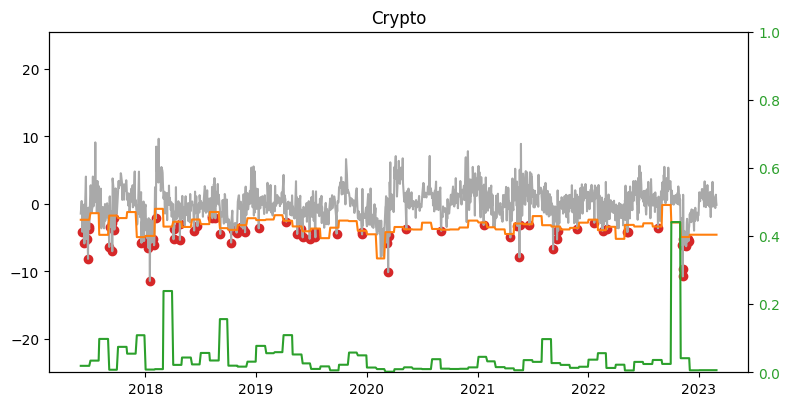

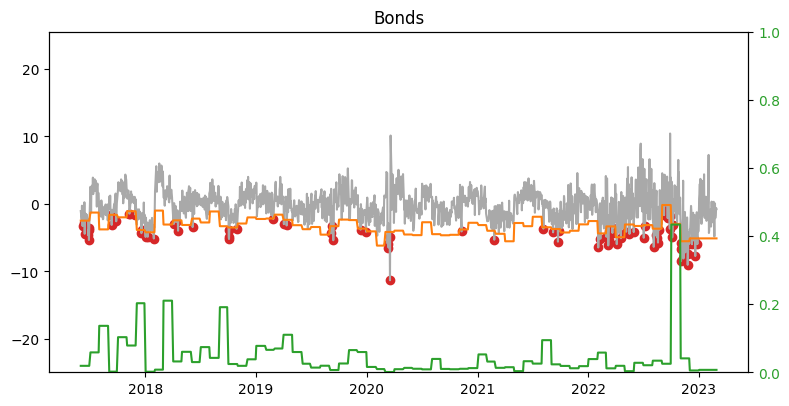

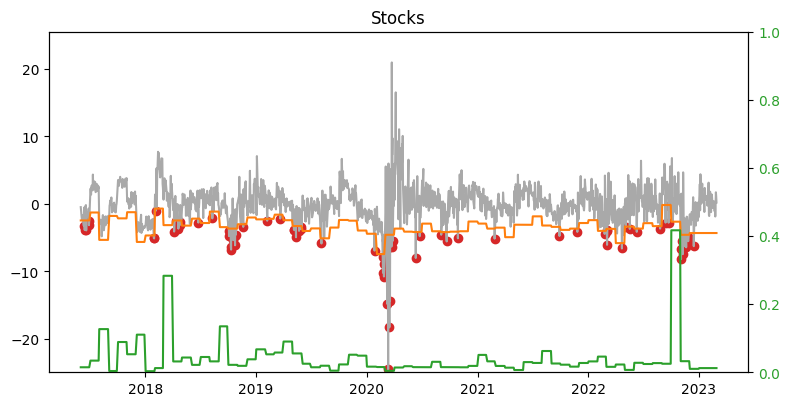

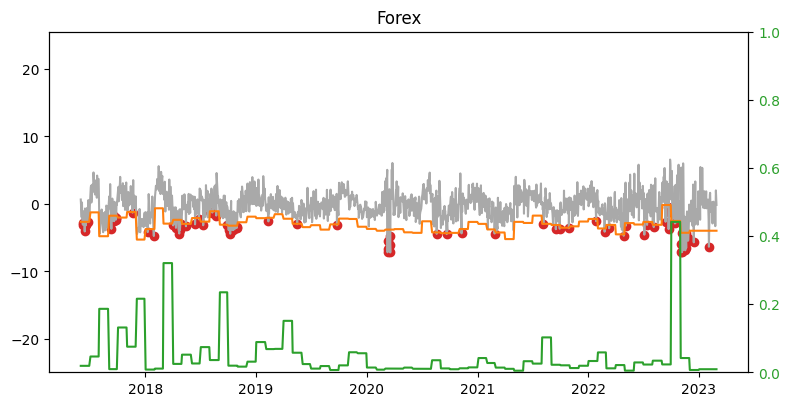

{'Crypto': 0.05172413793103448, 'Bonds': 0.05726600985221675, 'Stocks': 0.05110837438423645, 'Forex': 0.05357142857142857}


In [3]:
save = SAVE

indices = test_lin_activation.index
min_ = test_lin_activation.min().min() - 5
max_ = test_lin_activation.max().max()
exceedances = {}
for i, c in enumerate(test_lin_activation.columns):
    temp = test_lin_activation.loc[indices, c] - relu_act_threshold.loc[indices, c]
    mask = temp.index[temp <= - relu_act_threshold.loc[indices, c]]
    exceedances[c] = len(mask)/len(temp)
    
    fig, ax1 = plt.subplots(figsize=(8,4))
    ax1.plot(temp, color="darkgrey")
    ax1.plot(- relu_act_threshold.loc[indices, c], c="tab:orange")
    ax1.scatter(mask, temp.loc[mask], c="tab:red")
    ax1.set_ylim(min_, max_)

    ax1.tick_params(axis='y')
    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
    ax2.plot(exceedance.loc[indices, c], color="tab:green")
    ax2.tick_params(axis='y', labelcolor="tab:green")
    ax2.set_ylim(0,1)
    fig.tight_layout()

    if not save:
        plt.title(c)
    else:
        plt.savefig(f"{SAVE_DIR}/d1_{c}_factor_u_ts.png", transparent=True, bbox_inches="tight")
    plt.show()

print(exceedances)

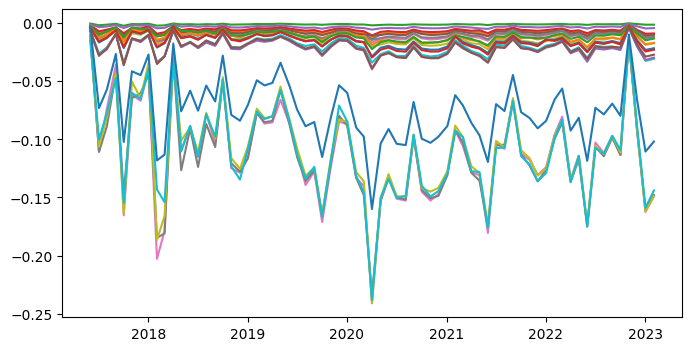

In [4]:
save = SAVE
plt.figure(figsize=(8,4))
_ = plt.plot(intercept[~intercept.duplicated()])
if save:
    plt.savefig(f"{SAVE_DIR}/d1_intercept_ts.png", transparent=True, bbox_inches="tight")
plt.show()

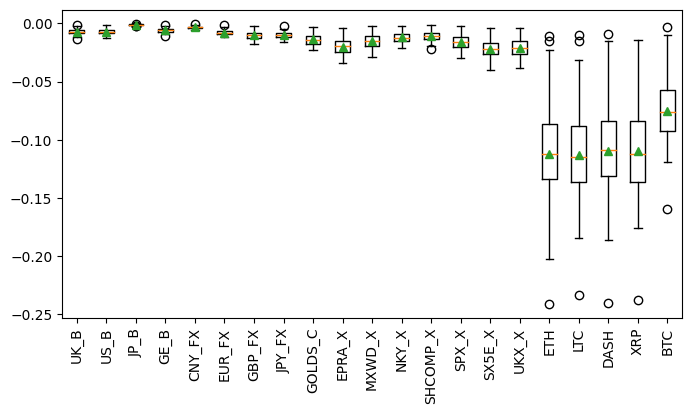

In [5]:
save = SAVE
plt.figure(figsize=(8,4))
_ = plt.boxplot(intercept[~intercept.duplicated()], showmeans=True)
_ = plt.xticks(range(1, intercept.shape[1] + 1), intercept.columns, rotation=90)
if save:
    plt.savefig(f"{SAVE_DIR}/d1_intercept_boxplot.png", transparent=True, bbox_inches="tight")
plt.show()